<a href="https://colab.research.google.com/github/neemomo/Codestates_Project1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [3]:
df.corr().loc[:, 'price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

상관계수의 절댓값이 클 수록 높은 상관관계가 있다.

따라서 sqft_living 특성이 price 특성과 가장 높은 상관관계를 가진다고 볼 수 있다.

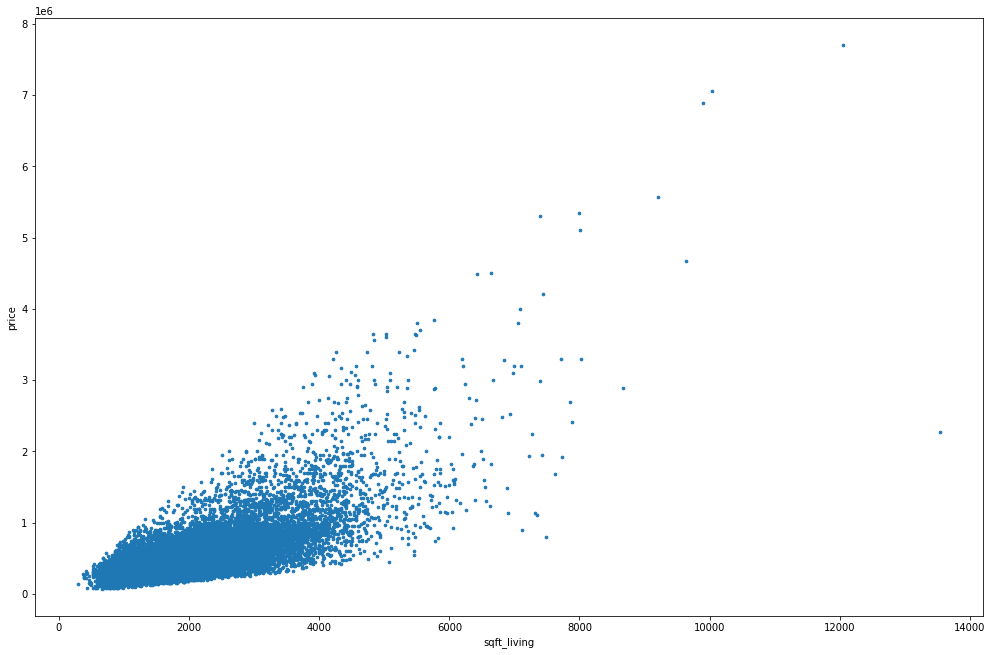

In [4]:
plt.figure(figsize = (17, 11))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df['sqft_living'], df['price'], s = 7);

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소수점 이하 반올림)**

In [5]:
mea = df['price'].mean()

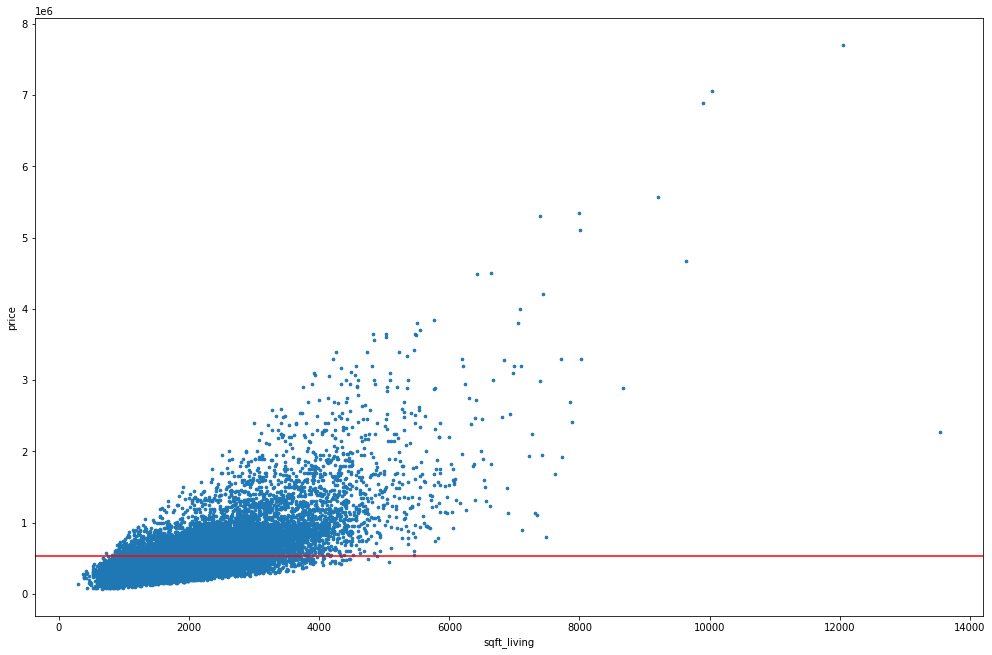

In [6]:
plt.figure(figsize = (17, 11))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.axhline(mea, c = 'red')
plt.scatter(df['sqft_living'], df['price'], s = 7);

In [7]:
print(f'기준모델의 예측값: {mea}')

기준모델의 예측값: 540088.1417665294


### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [17]:
### 이곳에서 과제를 진행해 주세요 ###
linear_model = LinearRegression()

feature = ['sqft_living']
target = ['price']

linear_model.fit(df[feature], df[target])

LinearRegression()

In [30]:
input = [15000]

output = linear_model.predict(pd.DataFrame({'sqft_living': input}))[0][0]

print(f'sqft_living = {input} 일 때 예상 price = {output}')

sqft_living = [15000] 일 때 예상 price = 4165772.7753672497


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [31]:
### 이곳에서 과제를 진행해 주세요 ###
input2 = [10000, 15000, 20000, 25000, 30000, 100000]

output2 = linear_model.predict(pd.DataFrame({'sqft_living': input2}))[:, 0]

for i in range(len(input2)):
    print(f'sqft_living = {input2[i]} 일 때 예상 price = {output2[i]}')

sqft_living = 10000 일 때 예상 price = 2762654.9358800086
sqft_living = 15000 일 때 예상 price = 4165772.7753672497
sqft_living = 20000 일 때 예상 price = 5568890.614854491
sqft_living = 25000 일 때 예상 price = 6972008.454341732
sqft_living = 30000 일 때 예상 price = 8375126.293828974
sqft_living = 100000 일 때 예상 price = 28018776.04665035


In [36]:
print(f'sqft_living 이 1 늘어날 때마다 price 예상치는 {linear_model.coef_[0, 0]} 늘어남')

sqft_living 이 1 늘어날 때마다 price 예상치는 280.62356789744825 늘어남


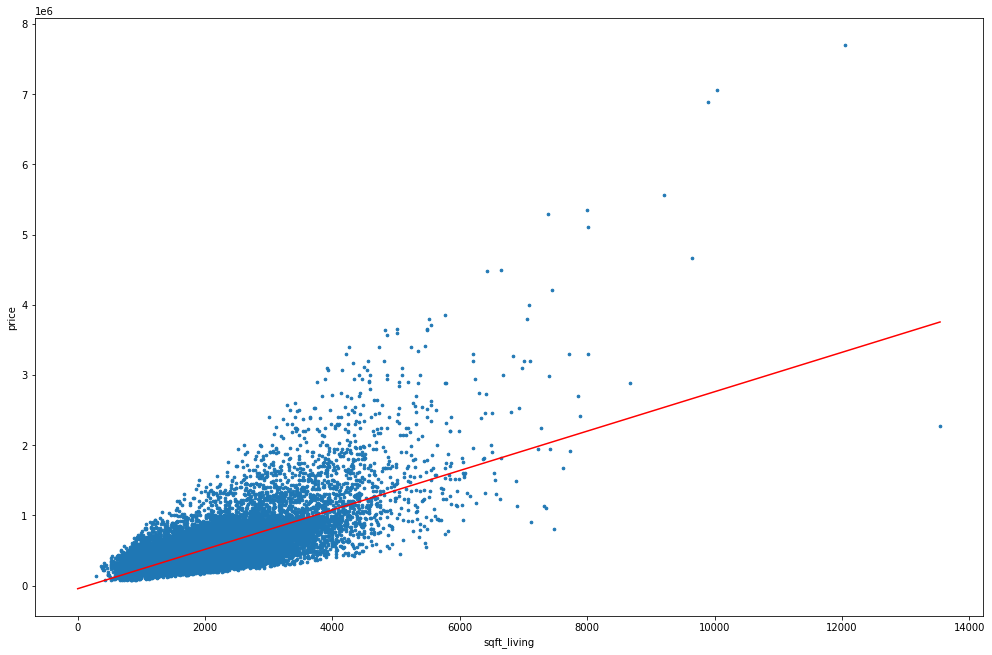

In [60]:
## 잘 그어졌는지 확인

slope = linear_model.coef_[0, 0]
intercept = linear_model.intercept_[0]
M = df['sqft_living'].max()

plt.figure(figsize = (17, 11))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df['sqft_living'], df['price'], s = 7)
plt.plot((0, M), (intercept, M*slope + intercept), c = 'red');

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [64]:
linear_model2 = LinearRegression()

linear_model2.fit(df[['bathrooms']], df[['price']])

slope2 = linear_model2.coef_[0, 0]
intercept2 = linear_model2.intercept_[0]

M2 = df['bathrooms'].max()

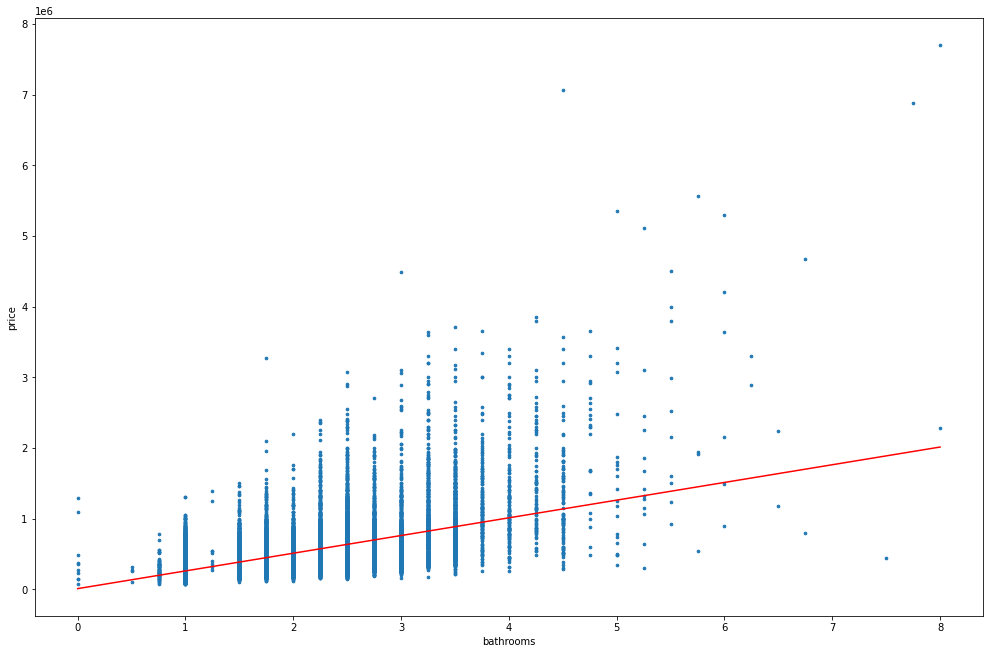

In [65]:
plt.figure(figsize = (17, 11))
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.scatter(df['bathrooms'], df['price'], s = 7)
plt.plot((0, M2), (intercept2, M2*slope2 + intercept2), c = 'red');

In [10]:
# 빨간 선이 전체 분포를 잘 설명한다고 보기는 힘들다...

## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.

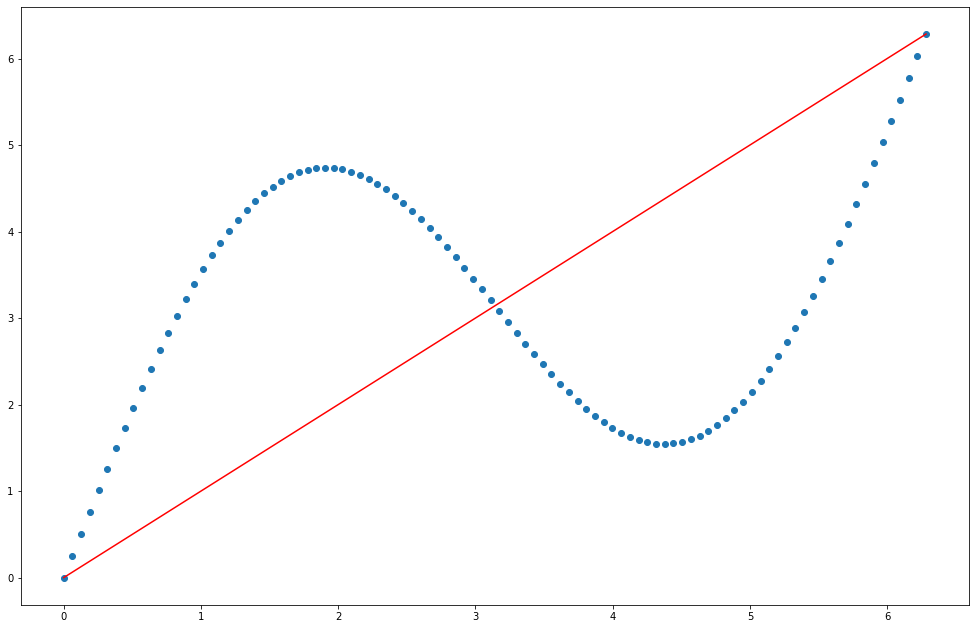

In [82]:
x = np.linspace(0, 2*np.pi, 100)
y = x + 3*np.sin(x)

plt.figure(figsize = (17, 11))
plt.plot((0, 2*np.pi), (0, 2*np.pi), c = 'red')
plt.scatter(x, y);

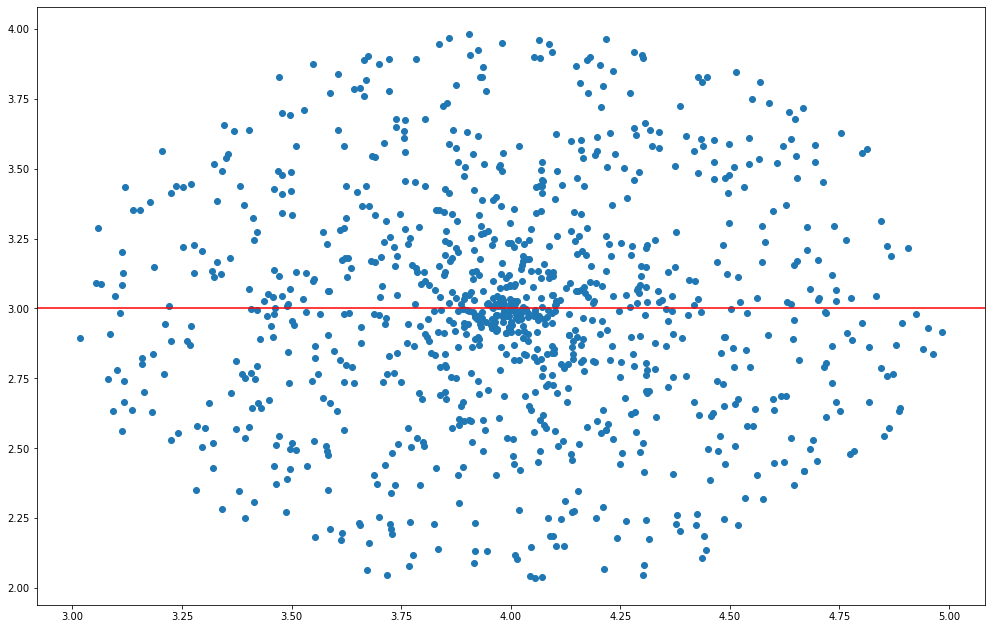

In [88]:
n = 1000

r = np.random.random(n)
w = np.random.random(n) * 2 * np.pi

center = (4, 3)

x = center[0] + r * np.cos(w)
y = center[1] + r * np.sin(w)

plt.figure(figsize = (17, 11))
plt.axhline(center[1], c = 'red')
plt.scatter(x, y);

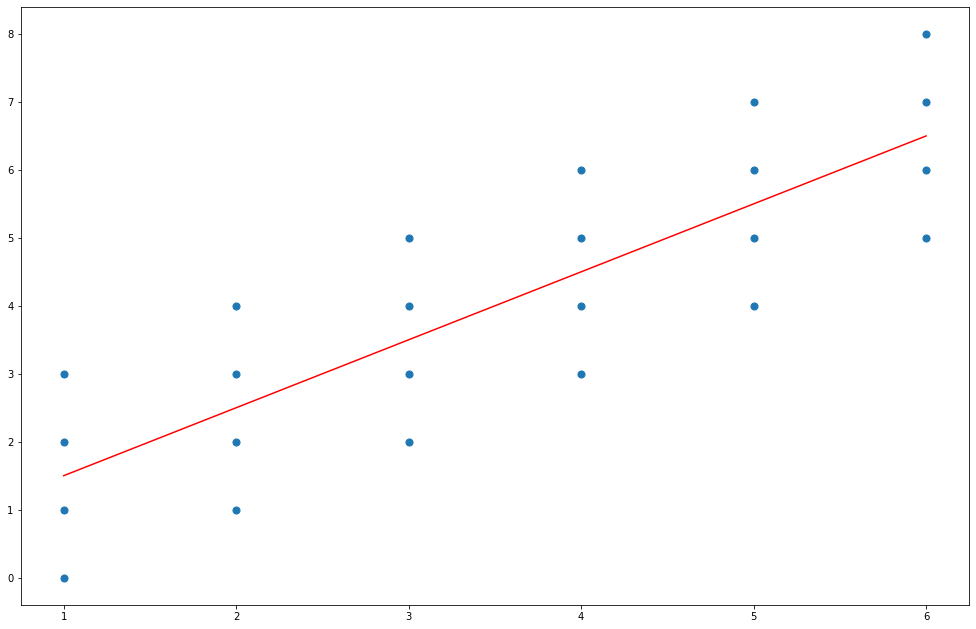

In [96]:
x = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8]

plt.figure(figsize = (17, 11))
plt.plot((1, 6), (1.5, 6.5), c = 'red')
plt.scatter(x, y, s = 50);

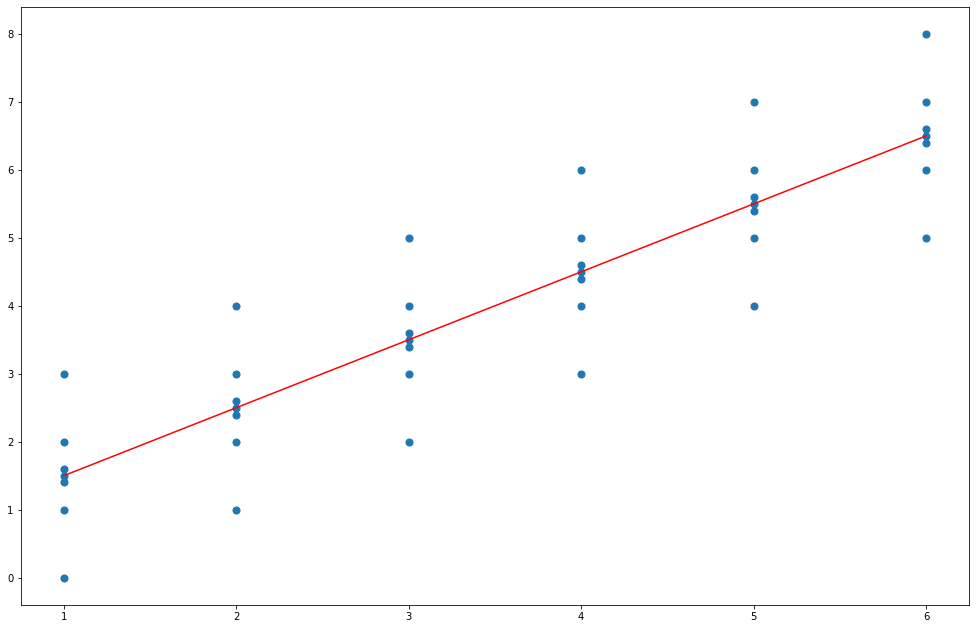

In [98]:
x = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

plt.figure(figsize = (17, 11))
plt.plot((1, 6), (1.5, 6.5), c = 'red')
plt.scatter(x, y, s = 50);